In [37]:
import pandas as pd
from pandas import HDFStore,DataFrame
import numpy as np
import csv
import plotly.plotly as py
import plotly.tools as tls 
from plotly.graph_objs import *
import cufflinks

%matplotlib inline

py.sign_in('sasha.stoikov', 'tgjlyepa0n')

ticker='AXP' #bad 0.0176
ticker='BA' #bad 0.0256

ticker='CAT' #bad 0.0348
ticker='DD'  #ok 0.017
ticker='DIS' #ok 0.0145

ticker='HD' #ok 0.0154

ticker='IBM' #ok 0.0626
ticker='INTC' #bad 0.0121
ticker='JNJ' #ok 0.0150

ticker='KO' #ok 0.0149
ticker='MCD' #ok 0.0195
#abc ticker='MMM' #bad 0.0271
#ticker='MRK' #ok 0.0141
ticker='MSFT' #bad 0.0121

spread=0.01
#ticker='JPM' #good 0.0141
#ticker='KFT' #good 0.0135
ticker='GE' #good 0.0128
#ticker='HPQ' #good 0.0135
#ticker='BAC' #good 0.0118
#ticker='AA' #good 0.0126

#ticker='8604.T'
#ticker='ES'
#ticker='ES_flashcrash'
#spread=0.25

Charle's data

In [27]:
#charles=pd.read_hdf('data/microsoft_2014_jan_02.h5','df')
hdf = HDFStore('data/microsoft_2014_jan_02.h5')
print hdf.df_trades.head()

        bid    ask                    ts_recv  price   qty  bid_size  \
1643  37.27  37.28 2014-01-02 16:22:06.341000  37.27  1000      2081   
1644  37.27  37.28 2014-01-02 16:22:06.342000  37.27   200      1081   
1645  37.27  37.28 2014-01-02 16:22:06.342000  37.27   350       881   
1646  37.27  37.28 2014-01-02 16:22:06.342000  37.27   100       531   
1647  37.27  37.28 2014-01-02 16:22:06.342000  37.27   100       431   

      ask_size  status qualifier  source  
1643      5788     800    Normal  NASDAQ  
1644      5788     800    Normal  NASDAQ  
1645      5788     800    Normal  NASDAQ  
1646      5788     800    Normal  NASDAQ  
1647      5788     800    Normal  NASDAQ  


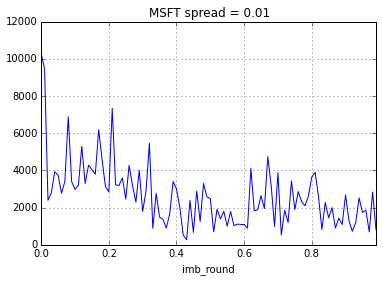

In [28]:
spread=0.01
df=hdf.df_trades
df['bid']=np.round(df['bid'],2)
df['ask']=np.round(df['ask'],2)
df['price']=np.round(df['price'],2)
df['spread']=np.round(df['ask']-df['bid'],2)
df['imb']=df['bid_size']/(df['bid_size']+df['ask_size'])
df['side']=np.array(df['price']>=df['ask']).astype(int)-np.array(df['price']<=df['bid']).astype(int)
df['spread'].mean()
df['imb_round']=np.round(df['imb'],2)
volume_group=df[df['spread']==spread].groupby(['imb_round'])
volume_group['qty'].sum().plot(title=ticker+' spread = 0.01')


Only run this once! it takes a while

In [61]:
# clean the data
reader = csv.reader(open("data/%s.csv"%str(ticker), "rb"), delimiter='\t')

f = csv.writer(open("data/%s_clean.csv"%str(ticker), "wb"))
i=0
for line in reader:
    try: 
        y=int(line[0][0])
        #print map(float,line[0].split(','))[0]
        f.writerow(line[0].split(','))
    except:
        i=i+1
        
    i=i+1
    if i%500000==0:
        print i

500000
1000000
1500000
2000000
2500000
3000000
3500000
4000000
4500000
5000000
5500000
6000000


Load Abergel data

In [38]:
df=pd.read_csv("data/%s_clean.csv"%str(ticker))
#df=pd.read_csv("data/%s.csv"%str(ticker))
len(df)

3420725

In [39]:

df.columns=['date','time','bid','bs','ask','as','price','size']
df['bid']=np.round(df['bid'],2)
df['ask']=np.round(df['ask'],2)
df['price']=np.round(df['price'],2)
df['spread']=np.round(df['ask']-df['bid'],2)
df['imb']=df['bs']/(df['bs']+df['as'])
df['side']=np.array(df['price']==df['ask']).astype(int)-np.array(df['price']==df['bid']).astype(int)+np.array(df['price']>df['ask']).astype(int)*2-np.array(df['price']<df['bid']).astype(int)*2
df=df[df['bid']>0] #remove negative bids
df=df[np.abs(df['side'])<2] #remove trades outside the bid/ask spread
df['spread'].mean()


0.012816918968720475

In [30]:
df[df['side']==2].head(20)

,date,time,bid,bs,ask,as,price,size,spread,imb,side


In [40]:
df['imb_round']=np.round(df['imb'],2)

In [41]:
#df=df[df['size']<=100]

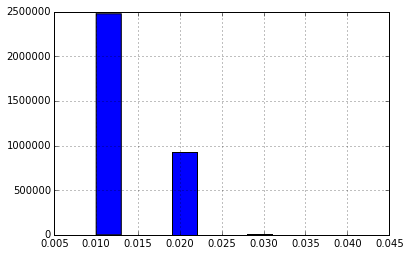

In [42]:
df[(df['spread']>0) & (df['spread']<0.05)]['spread'].hist()

In [43]:
spread_group=df[df['spread']>0].groupby(['spread','side'])
spread_group['size'].count()

spread  side
0.01    -1      1268760
         1      1206701
0.02    -1        19276
         0       890912
         1        17701
0.03    -1         1315
         0         7294
         1         1022
0.04    -1          443
         0         1540
         1          329
0.05    -1          204
         0          515
         1           89
0.06    -1           31
         0          205
         1          104
0.07    -1           47
         0           95
         1           15
0.08    -1            8
         0           51
         1            2
0.09    -1            2
         0           32
         1            5
0.10    -1            3
         0           14
         1            1
0.11    -1            4
         0            7
         1            2
0.12    -1            4
         0           22
         1            3
0.13     0            5
         1            1
0.14    -1            3
         0            2
         1            3
0.15    -1            1
   

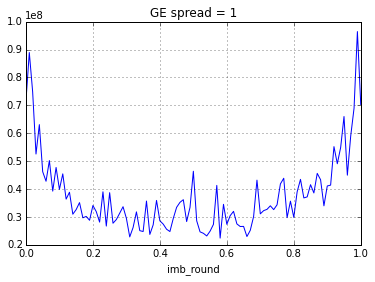

In [44]:
volume_group=df[df['spread']==spread].groupby(['imb_round'])
volume_group['size'].sum().plot(title=ticker+' spread = 1')

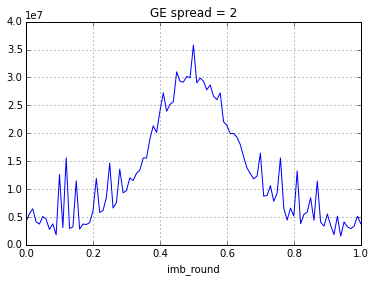

In [45]:
volume_group=df[df['spread']==2*spread].groupby(['imb_round'])
volume_group['size'].sum().plot(title=ticker+' spread = 2')